# Loan Prediction using Machine Learning

Following Factors are:
1. Gender
2. Education
3. Marrital status
4. Loand Amount
5. Credit History
6. Account Balance
7. Property Area
8. Credit History
9. Dependants
10. Self Employment Status



In [94]:
import pandas as pd
import numpy as np

In [95]:
train=pd.read_csv('train.csv')
train.Loan_Status=train.Loan_Status.map({'Y':1,'N':0})

## Check the missing Values in data

In [96]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Preprocessing on the data

In [97]:
Loan_status=train.Loan_Status
train.drop('Loan_Status',axis=1,inplace=True)
test=pd.read_csv('test.csv')
Loan_ID=test.Loan_ID
data=train.append(test)
data.head()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_19412\3849057500.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=train.append(test)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [98]:
data.shape

(981, 12)

In [99]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [100]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

In [101]:
data.Dependents.dtypes

dtype('O')

<Axes: >

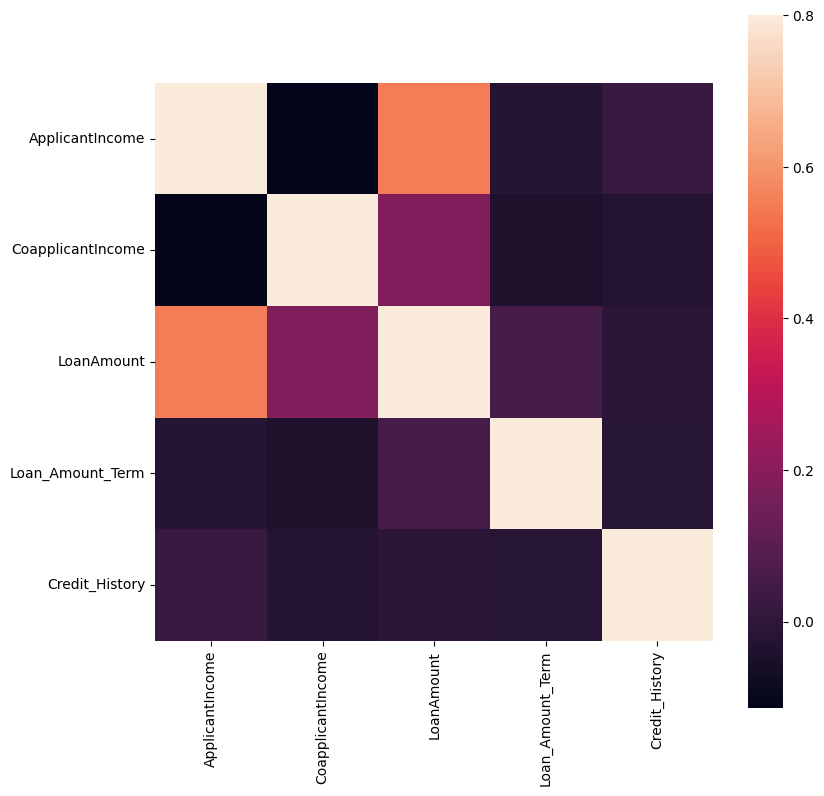

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

# Loan Prediction EDA

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Gender', ylabel='count'>

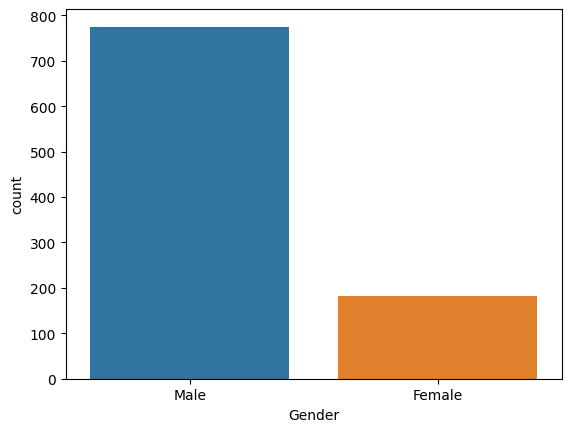

In [105]:
sns.countplot(x='Gender',data=data)
# Majority of loan takers are male 

<Axes: xlabel='Education', ylabel='count'>

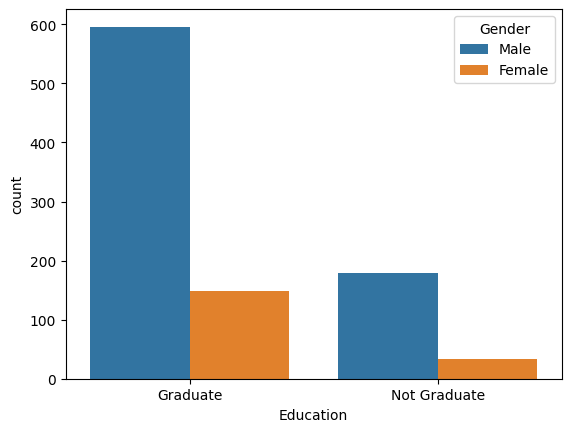

In [107]:
sns.countplot(x='Education',hue='Gender',data=data)
# majority are Graduate

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='ApplicantIncome'>

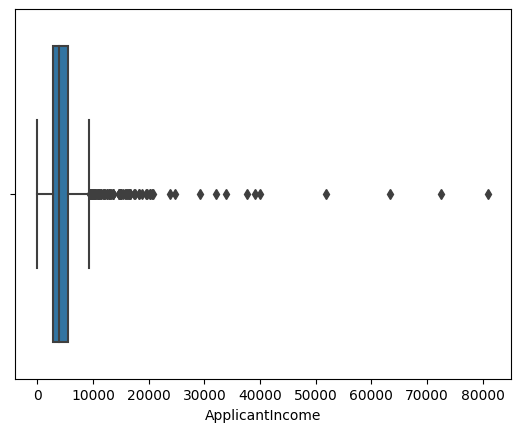

In [108]:
sns.boxplot(data['ApplicantIncome'])
# most of the datapoints have income<10000

In [110]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


<Axes: xlabel='Self_Employed', ylabel='LoanAmount'>

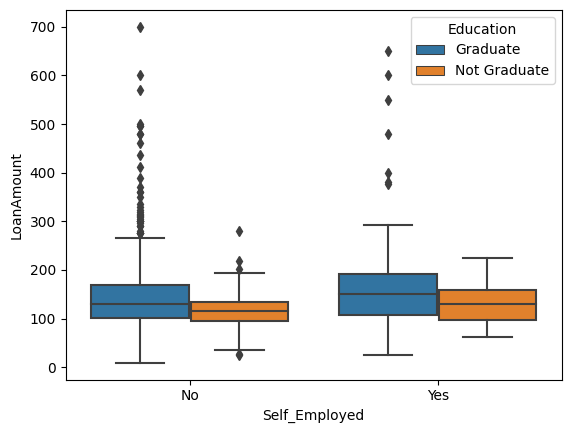

In [112]:
sns.boxplot(x='Self_Employed',y='LoanAmount',hue='Education',data=data)
# Self employed Graduate have tendency to take bigger loan amounts 

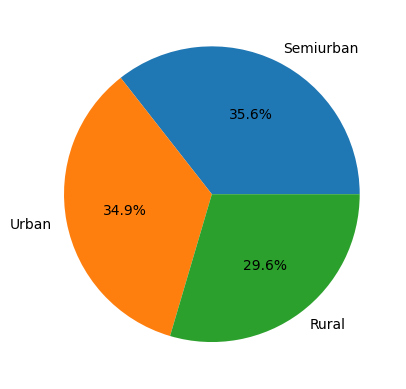

In [115]:
#Distrinution of Peoples living regions
s=data['Property_Area'].value_counts()/data['Property_Area'].value_counts().sum()*100
plt.pie(s.values,labels=s.index,autopct='%1.1f%%')
plt.show()

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

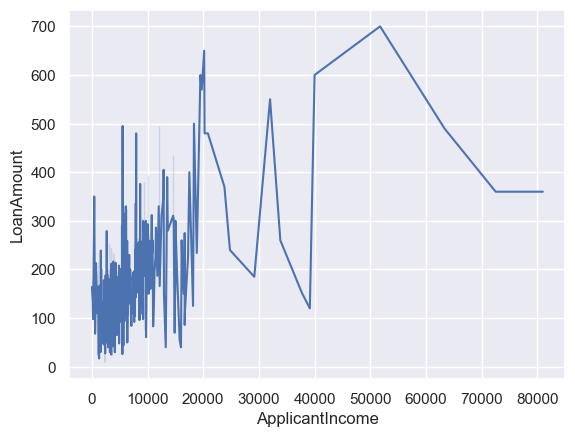

In [126]:
sns.lineplot(x='ApplicantIncome',y='LoanAmount',data=data)
#Loan Amount mostly increases with applicant income

<Axes: xlabel='CoapplicantIncome', ylabel='LoanAmount'>

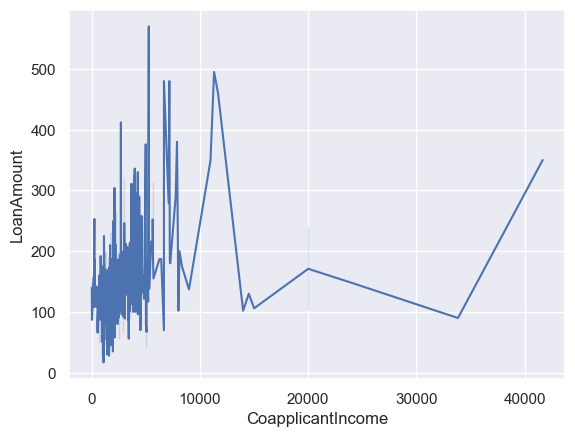

In [127]:
sns.lineplot(x='CoapplicantIncome',y='LoanAmount',data=data)
#Loan Amount mostly increases with CoapplicantIncome

In [131]:
#splitting Applicant Income to [High,Medium,Low]
l=[]
for i in data['ApplicantIncome']:
    if i>5060:
        l.append('High')
    elif i<5060 and i>3786:
        l.append('Medium')
    else:
        l.append('Low')
data['ApplicantIncomeStatus']=pd.Series(l)
data['CoapplicantIncome']=np.where(data['CoapplicantIncome']>0,'Yes','No')

In [133]:
data['ApplicantIncomeStatus'].value_counts()

Low       489
High      281
Medium    211
Name: ApplicantIncomeStatus, dtype: int64

<Axes: xlabel='ApplicantIncomeStatus', ylabel='LoanAmount'>

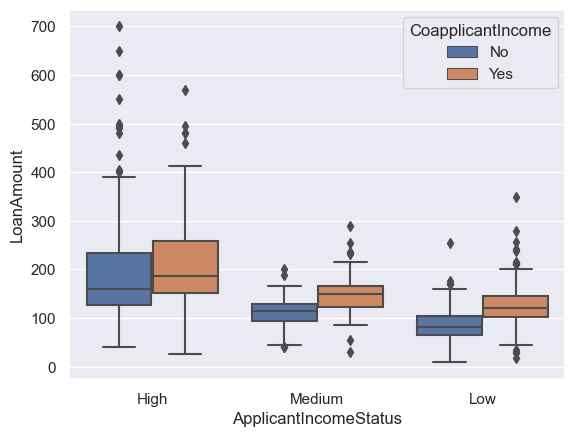

In [135]:
sns.boxplot(x='ApplicantIncomeStatus',y='LoanAmount',hue='CoapplicantIncome',data=data)
# Loan Amount Considerably affected by CoapplicantIncome
# Loan Amount affected by ApplicantIncomeStatus

<Axes: xlabel='Property_Area', ylabel='LoanAmount'>

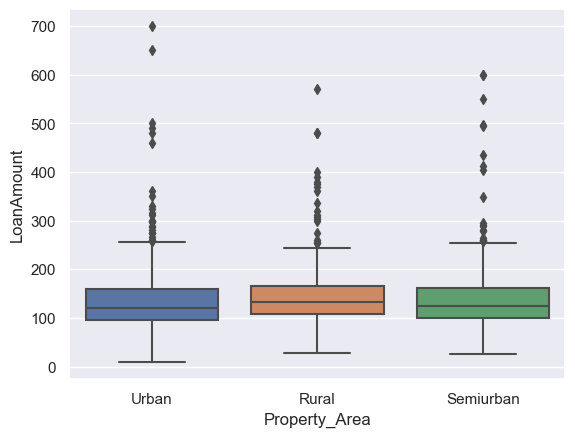

In [137]:
sns.boxplot(x='Property_Area',y='LoanAmount',data=data)
#Loan Amount not dependent on Property Area


In [138]:
data.groupby(['Married','Education','Self_Employed','Dependents'])['LoanAmount'].mean()
# Target Audience For bigger loan amounts:
# Married
#[Self Employed,Both]
#Graduate

Married  Education     Self_Employed  Dependents
No       Graduate      No             0             124.950276
                                      1             127.842105
                                      2             126.000000
                                      3+            173.285714
                       Yes            0             152.360000
                                      1             128.000000
                                      2             187.000000
                                      3+            292.000000
         Not Graduate  No             0             100.434783
                                      1              91.833333
                                      2             125.666667
                                      3+             88.000000
                       Yes            0             151.666667
                                      1             136.666667
Yes      Graduate      No             0             144.519553
      

<Axes: >

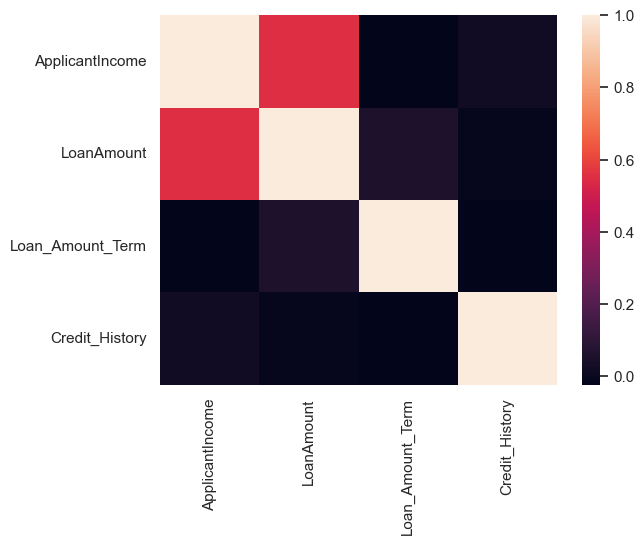

In [140]:
sns.heatmap(data.corr())

## Label ENcode

In [86]:
## Label encoding for gender
data.Gender=data.Gender.map({'Male':1,'Female':0})
data.Gender.value_counts()

1.0    775
0.0    182
Name: Gender, dtype: int64

In [88]:
## Labelling 0 & 1 for Marrital status
data.Married=data.Married.map({'Yes':1,'No':0})

In [89]:
data.Married.value_counts()

1.0    631
0.0    347
Name: Married, dtype: int64

In [90]:
## Labelling 0 & 1 for Dependents
data.Dependents=data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [91]:
data.Dependents.value_counts()

0.0    545
1.0    160
2.0    160
3.0     91
Name: Dependents, dtype: int64

In [23]:
## Labelling 0 & 1 for Education Status
data.Education=data.Education.map({'Graduate':1,'Not Graduate':0})

In [24]:
data.Education.value_counts()

1    763
0    218
Name: Education, dtype: int64

In [25]:
## Labelling 0 & 1 for Employment status
data.Self_Employed=data.Self_Employed.map({'Yes':1,'No':0})

In [26]:
data.Self_Employed.value_counts()

0.0    807
1.0    119
Name: Self_Employed, dtype: int64

In [27]:
data.Property_Area.value_counts()

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

In [28]:
## Labelling 0 & 1 for Property area
data.Property_Area=data.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})

In [29]:
data.Property_Area.value_counts()

1    349
2    342
0    290
Name: Property_Area, dtype: int64

<Axes: >

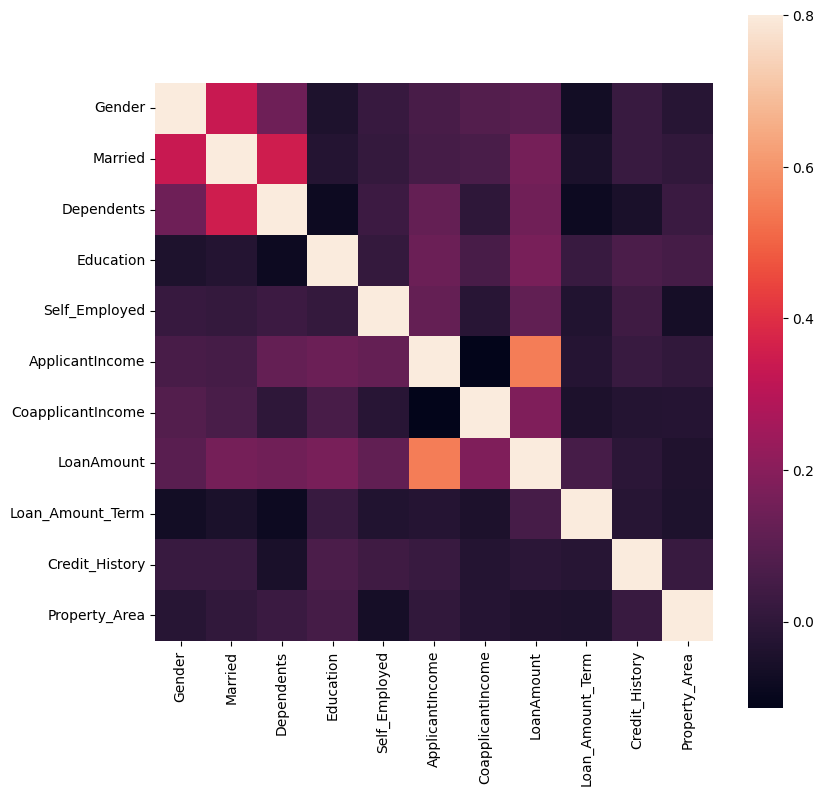

In [30]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [31]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


In [32]:
data.Credit_History.size

981

##  filling the missing values

In [33]:
data.Credit_History.fillna(np.random.randint(0,2),inplace=True)

In [34]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History        0
Property_Area         0
dtype: int64

In [35]:
data.Married.fillna(np.random.randint(0,2),inplace=True)

In [36]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               0
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History        0
Property_Area         0
dtype: int64

In [37]:
## Filling with median
data.LoanAmount.fillna(data.LoanAmount.median(),inplace=True)

In [38]:
## Filling with mean
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(),inplace=True)

In [39]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               0
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [40]:
data.Gender.value_counts()

1.0    775
0.0    182
Name: Gender, dtype: int64

In [41]:
## Filling Gender with random number between 0-2
from random import randint 
data.Gender.fillna(np.random.randint(0,2),inplace=True)

In [42]:
data.Gender.value_counts()

1.0    799
0.0    182
Name: Gender, dtype: int64

In [43]:
## Filling Dependents with median
data.Dependents.fillna(data.Dependents.median(),inplace=True)

In [44]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

<Axes: >

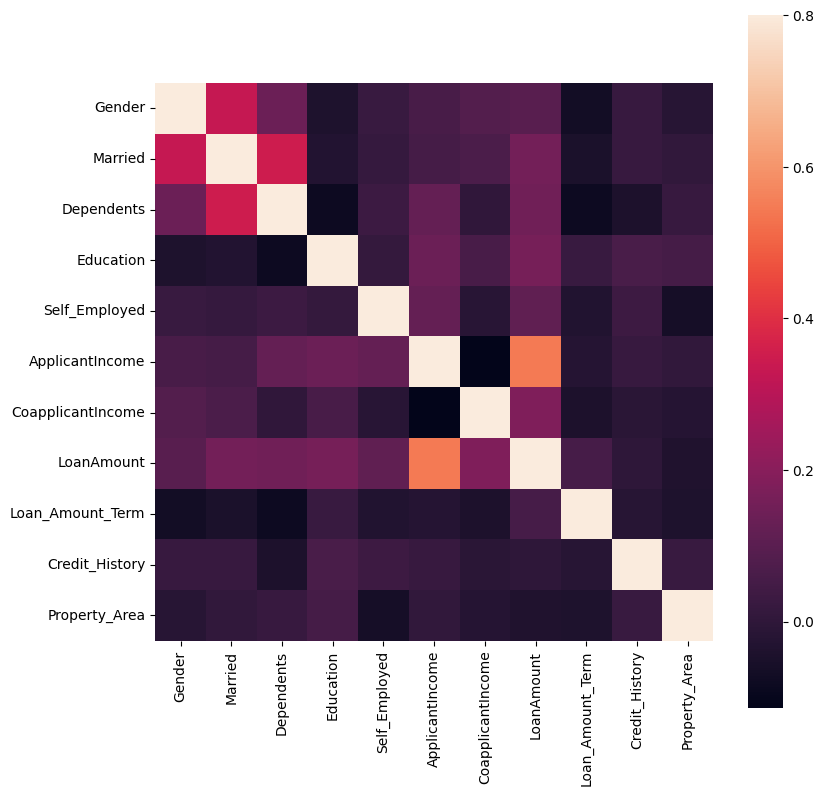

In [45]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [46]:
data.Self_Employed.fillna(np.random.randint(0,2),inplace=True)

In [47]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [48]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,126.0,360.0,1.0,2
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


In [49]:
## Dropping Loan ID from data, it's not useful
data.drop('Loan_ID',inplace=True,axis=1)

In [50]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [51]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,1,0.0,5849,0.0,126.0,360.0,1.0,2
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


## Split the Data into X & Y

In [52]:
train_X=data.iloc[:614,] ## all the data in X (Train set)
train_y=Loan_status  ## Loan status will be our Y

In [53]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(train_X,train_y,random_state=0)

In [54]:
#sc_f = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
#sc_f = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
train_X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
46,1.0,1.0,1.0,1,0.0,5649,0.0,44.0,360.0,1.0,2
272,1.0,0.0,0.0,1,0.0,2833,1857.0,126.0,360.0,1.0,0
474,1.0,0.0,2.0,1,0.0,5532,4648.0,162.0,360.0,1.0,0
382,0.0,0.0,0.0,1,0.0,6000,0.0,156.0,360.0,1.0,2
283,0.0,0.0,0.0,1,0.0,1811,1666.0,54.0,360.0,1.0,2


In [55]:
# train_X.head()

In [56]:
test_X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
454,1.0,0.0,0.0,1,1.0,7085,0.0,84.0,360.0,1.0,1
52,0.0,0.0,0.0,1,0.0,4230,0.0,112.0,360.0,1.0,1
536,1.0,1.0,0.0,1,0.0,6133,3906.0,324.0,360.0,1.0,2
469,1.0,1.0,0.0,1,0.0,4333,2451.0,110.0,360.0,1.0,2
55,1.0,1.0,2.0,1,0.0,2708,1167.0,97.0,360.0,1.0,1


## Using Different types of Machine Learning Model

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Fit the all ML Models

In [58]:
models=[]
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Linear Discriminant Analysis",LinearDiscriminantAnalysis()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Support Vector Classifier",SVC()))
models.append(("K- Neirest Neighbour",KNeighborsClassifier()))
models.append(("Naive Bayes",GaussianNB()))

In [59]:
scoring='accuracy'

In [60]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [61]:
for name,model in models:
    kfold=KFold(n_splits=10)
    cv_result=cross_val_score(model,train_X,train_y,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print(model)
    print("%s %f" % (name,cv_result.mean()))

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

LogisticRegression()
Logistic Regression 0.800000
DecisionTreeClassifier()
Decision Tree 0.656522
LinearDiscriminantAnalysis()
Linear Discriminant Analysis 0.802174
RandomForestClassifier()
Random Forest 0.797826
SVC()
Support Vector Classifier 0.673913
KNeighborsClassifier()
K- Neirest Neighbour 0.647826
GaussianNB()
Naive Bayes 0.795652


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

LR=LogisticRegression()
LR.fit(train_X,train_y)
pred=LR.predict(test_X)
print("Model Accuracy:- ",accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

Model Accuracy:-  0.8376623376623377
[[ 20  23]
 [  2 109]]
              precision    recall  f1-score   support

           0       0.91      0.47      0.62        43
           1       0.83      0.98      0.90       111

    accuracy                           0.84       154
   macro avg       0.87      0.72      0.76       154
weighted avg       0.85      0.84      0.82       154



C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
print(pred)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 0 1 1 1 0]


In [64]:
X_test=data.iloc[614:,] 
# X_test[sc_f]=SC.fit_transform(X_test[sc_f])

In [65]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1.0,0.0,1,0.0,5720,0.0,110.0,360.0,1.0,2
1,1.0,1.0,1.0,1,0.0,3076,1500.0,126.0,360.0,1.0,2
2,1.0,1.0,2.0,1,0.0,5000,1800.0,208.0,360.0,1.0,2
3,1.0,1.0,2.0,1,0.0,2340,2546.0,100.0,360.0,1.0,2
4,1.0,0.0,0.0,0,0.0,3276,0.0,78.0,360.0,1.0,2


In [66]:
prediction = LR.predict(X_test)

In [67]:
print(prediction)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [68]:
## TAken data from the dataset
t = LR.predict([[0.0,	0.0,	0.0,	1,	0.0,	1811,	1666.0,	54.0,	360.0,	1.0,	2]])

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [69]:
print(t)

[1]


In [70]:
from sklearn.svm import SVC
model = SVC()
model.fit(train_X, train_y)

SVC()

In [72]:
import pickle
# now you can save it to a file
file = 'Model1.pkl'
with open(file, 'wb') as f:
    pickle.dump(model, f)

In [73]:
with open(file, 'rb') as f:
    k = pickle.load(f)

In [74]:
cy = k.predict([[0.0,	0.0,	0.0,	1,	0.0,	4230,	0.0,	112.0,	360.0,	1.0,	1]])
print(cy)

[1]


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
